In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

# Loading data

## Consolidated run/simulation results

In [2]:
import sqlite3

import pandas as pd

prefix = "binaryoptimization/maxcut"
# prefix = "discreteoptimization/tsp"
# prefix = "binaryoptimization/max3sat/satlib"

clauses = [
    f"`hid` LIKE '{prefix}%'",
    # "`n_qaoa_steps` = 2",
]
query = "SELECT * FROM `results` WHERE " + " AND ".join(clauses)
with sqlite3.connect("out/run.aer.hm=p,hc=m,max/results.db") as db:
    df = pd.read_sql(query, db)

df.drop(
    [
        "ibmq_jid",
        "ibmq_sid",
        "backend",
    ],
    axis=1,
    inplace=True,
)
df.dropna(inplace=True)

print("Number of runs:", len(df["jid"].unique()))
df

Number of runs: 11291


,hid,energy,step,reordering_jid,jid
0,binaryoptimization/maxcut/ciqube/ratio912-hams...,-0.039233,0,243344cb7ba86292bfacedef42769722da9cd395,a5bcce590149725e1e92433196d40631592d08ec
1,binaryoptimization/maxcut/ciqube/ratio912-hams...,-0.012584,1,243344cb7ba86292bfacedef42769722da9cd395,a5bcce590149725e1e92433196d40631592d08ec
2,binaryoptimization/maxcut/ciqube/ratio912-hams...,0.006859,2,243344cb7ba86292bfacedef42769722da9cd395,a5bcce590149725e1e92433196d40631592d08ec
3,binaryoptimization/maxcut/ciqube/ratio912-hams...,0.307755,3,243344cb7ba86292bfacedef42769722da9cd395,a5bcce590149725e1e92433196d40631592d08ec
4,binaryoptimization/maxcut/ciqube/ratio912-hams...,-0.113556,4,243344cb7ba86292bfacedef42769722da9cd395,a5bcce590149725e1e92433196d40631592d08ec
...,...,...,...,...,...
1394427,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,0.048932,123,56dcf49de2b6770b65fde73cdd96f409650aa0ed,67f4cc155e70a1e8b5dc06c6986493613c2b96cb
1394428,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,0.048937,124,56dcf49de2b6770b65fde73cdd96f409650aa0ed,67f4cc155e70a1e8b5dc06c6986493613c2b96cb
1394429,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,0.048941,125,56dcf49de2b6770b65fde73cdd96f409650aa0ed,67f4cc155e70a1e8b5dc06c6986493613c2b96cb
1394430,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,0.048943,126,56dcf49de2b6770b65fde73cdd96f409650aa0ed,67f4cc155e70a1e8b5dc06c6986493613c2b96cb


## Join with consolidated reordering results

In [3]:
query = f"SELECT * FROM `results` WHERE `hid` LIKE '{prefix}%'"
with sqlite3.connect("out/reorder.hcs=m/results.db") as db:
    rdf = pd.read_sql(query, db)

rdf.dropna(inplace=True)
rdf.drop(["hid"], axis=1, inplace=True)

df, rdf = df.set_index("reordering_jid"), rdf.set_index("jid")
df = df.join(rdf, how="inner")
df.reset_index(inplace=True)

df["time"] = df["reordering_time"] + df["synthesis_time"]
df.drop(["reordering_time", "synthesis_time"], axis=1, inplace=True)

df

,reordering_jid,hid,energy,step,jid,method,n_terms,n_qubits,n_timesteps,order,trotterization,depth,time
0,243344cb7ba86292bfacedef42769722da9cd395,binaryoptimization/maxcut/ciqube/ratio912-hams...,-0.039233,0,a5bcce590149725e1e92433196d40631592d08ec,misra_gries,7,33,1,4,suzuki_trotter,20,1.793
1,243344cb7ba86292bfacedef42769722da9cd395,binaryoptimization/maxcut/ciqube/ratio912-hams...,-0.012584,1,a5bcce590149725e1e92433196d40631592d08ec,misra_gries,7,33,1,4,suzuki_trotter,20,1.793
2,243344cb7ba86292bfacedef42769722da9cd395,binaryoptimization/maxcut/ciqube/ratio912-hams...,0.006859,2,a5bcce590149725e1e92433196d40631592d08ec,misra_gries,7,33,1,4,suzuki_trotter,20,1.793
3,243344cb7ba86292bfacedef42769722da9cd395,binaryoptimization/maxcut/ciqube/ratio912-hams...,0.307755,3,a5bcce590149725e1e92433196d40631592d08ec,misra_gries,7,33,1,4,suzuki_trotter,20,1.793
4,243344cb7ba86292bfacedef42769722da9cd395,binaryoptimization/maxcut/ciqube/ratio912-hams...,-0.113556,4,a5bcce590149725e1e92433196d40631592d08ec,misra_gries,7,33,1,4,suzuki_trotter,20,1.793
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394427,56dcf49de2b6770b65fde73cdd96f409650aa0ed,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,0.048932,123,67f4cc155e70a1e8b5dc06c6986493613c2b96cb,saturation,12,87,1,4,suzuki_trotter,55,3.050
1394428,56dcf49de2b6770b65fde73cdd96f409650aa0ed,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,0.048937,124,67f4cc155e70a1e8b5dc06c6986493613c2b96cb,saturation,12,87,1,4,suzuki_trotter,55,3.050
1394429,56dcf49de2b6770b65fde73cdd96f409650aa0ed,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,0.048941,125,67f4cc155e70a1e8b5dc06c6986493613c2b96cb,saturation,12,87,1,4,suzuki_trotter,55,3.050
1394430,56dcf49de2b6770b65fde73cdd96f409650aa0ed,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,0.048943,126,67f4cc155e70a1e8b5dc06c6986493613c2b96cb,saturation,12,87,1,4,suzuki_trotter,55,3.050


In [4]:
# ONLY KEEP HIDs WHERE ALL METHODS HAVE BEEN RAN


def _f(a: pd.DataFrame) -> pd.DataFrame:
    return pd.DataFrame({"n_methods": [len(a["method"].unique())]})


a = df.groupby("hid").apply(_f, include_groups=False)
a["keep"] = a["n_methods"] == len(df["method"].unique())
a.reset_index(inplace=True)
a = a[["hid", "keep"]]
a.set_index("hid", inplace=True)

df.set_index("hid", inplace=True)
df = df.join(a, on="hid", how="inner")
df = df[df["keep"]].copy()
df.reset_index(inplace=True)
df.drop(["keep"], axis=1, inplace=True)
df

,hid,reordering_jid,energy,step,jid,method,n_terms,n_qubits,n_timesteps,order,trotterization,depth,time
0,binaryoptimization/maxcut/ciqube/ratio912-hams...,243344cb7ba86292bfacedef42769722da9cd395,-0.039233,0,a5bcce590149725e1e92433196d40631592d08ec,misra_gries,7,33,1,4,suzuki_trotter,20,1.793
1,binaryoptimization/maxcut/ciqube/ratio912-hams...,243344cb7ba86292bfacedef42769722da9cd395,-0.012584,1,a5bcce590149725e1e92433196d40631592d08ec,misra_gries,7,33,1,4,suzuki_trotter,20,1.793
2,binaryoptimization/maxcut/ciqube/ratio912-hams...,243344cb7ba86292bfacedef42769722da9cd395,0.006859,2,a5bcce590149725e1e92433196d40631592d08ec,misra_gries,7,33,1,4,suzuki_trotter,20,1.793
3,binaryoptimization/maxcut/ciqube/ratio912-hams...,243344cb7ba86292bfacedef42769722da9cd395,0.307755,3,a5bcce590149725e1e92433196d40631592d08ec,misra_gries,7,33,1,4,suzuki_trotter,20,1.793
4,binaryoptimization/maxcut/ciqube/ratio912-hams...,243344cb7ba86292bfacedef42769722da9cd395,-0.113556,4,a5bcce590149725e1e92433196d40631592d08ec,misra_gries,7,33,1,4,suzuki_trotter,20,1.793
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304772,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,56dcf49de2b6770b65fde73cdd96f409650aa0ed,0.048932,123,67f4cc155e70a1e8b5dc06c6986493613c2b96cb,saturation,12,87,1,4,suzuki_trotter,55,3.050
1304773,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,56dcf49de2b6770b65fde73cdd96f409650aa0ed,0.048937,124,67f4cc155e70a1e8b5dc06c6986493613c2b96cb,saturation,12,87,1,4,suzuki_trotter,55,3.050
1304774,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,56dcf49de2b6770b65fde73cdd96f409650aa0ed,0.048941,125,67f4cc155e70a1e8b5dc06c6986493613c2b96cb,saturation,12,87,1,4,suzuki_trotter,55,3.050
1304775,binaryoptimization/maxcut/biqmac/rudy-hams/10-...,56dcf49de2b6770b65fde73cdd96f409650aa0ed,0.048943,126,67f4cc155e70a1e8b5dc06c6986493613c2b96cb,saturation,12,87,1,4,suzuki_trotter,55,3.050


In [5]:
def _print_col_stats(msg: str, s: pd.Series):
    d = s.describe()
    txt = f"count: {len(s)} | "
    txt += " | ".join(f"{k}: {v:>6.2f}" for k, v in zip(d.index, d) if k != "count")
    print(msg, "|", txt)


print("Nb. Hamiltonians:", len(df["hid"].unique()))
_print_col_stats("Nb. terms     ", df["n_terms"])
_print_col_stats("Nb. of qubits ", df["n_qubits"])
_print_col_stats("Evo. qc depth.", df["depth"])

Nb. Hamiltonians: 3522
Nb. terms      | count: 1304777 | mean:   9.15 | std:   1.55 | min:   7.00 | 25%:   8.00 | 50%:   9.00 | 75%:  10.00 | max:  12.00
Nb. of qubits  | count: 1304777 | mean:  75.96 | std:  23.74 | min:   8.00 | 25%:  61.00 | 50%:  80.00 | 75%:  95.00 | max: 127.00
Evo. qc depth. | count: 1304777 | mean:  46.04 | std:  12.08 | min:  20.00 | 25%:  35.00 | 50%:  45.00 | 75%:  55.00 | max:  95.00


# Max cumulative energy plot

In [6]:
df["ae/e"] = df["energy"] / df["n_terms"]
df["ae/e_cummax"] = df.groupby("jid")["ae/e"].cummax()

In [7]:
df_pretty = df.reset_index().rename(
    columns={
        "ae/e": "AE/e",
        "ae/e_cummax": "$\\tilde{\\mathcal{E}}$ (cumulative maximum)",
        "step": "Optimization step",
        "hid": "Problem instance",
        "method": "Coloring method",
    }
)
df_pretty = (
    df_pretty.set_index("Coloring method")
    .rename(
        index={
            "saturation": "Saturation on $G_{\\mathrm{overlap}}$",
            "misra_gries": "Misra-Gries on $G_{\\mathrm{inter.}}$",
            "none": "None",
        }
    )
    .reset_index()
)

prefix_length = len("binaryoptimization/maxcut/")
df_pretty["Problem instance"] = list(
    map(lambda s: s[prefix_length:], df_pretty["Problem instance"])
)

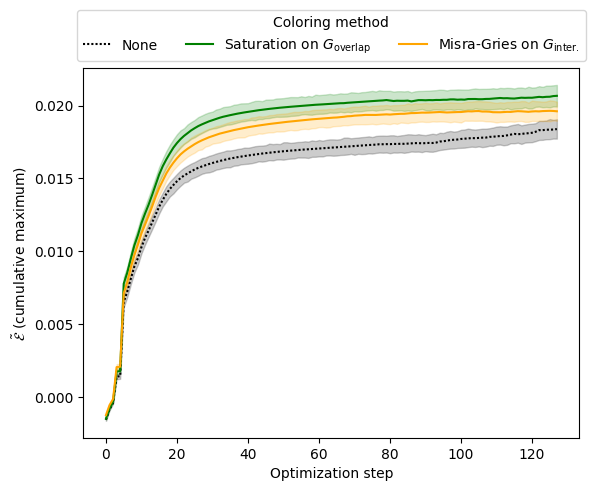

In [8]:
import seaborn as sns

ax = sns.lineplot(
    data=df_pretty,
    x="Optimization step",
    y="$\\tilde{\\mathcal{E}}$ (cumulative maximum)",
    hue="Coloring method",
    style="Coloring method",
    # errorbar=("ci", 95),  # the default
    hue_order=[
        "None",
        "Saturation on $G_{\\mathrm{overlap}}$",
        "Misra-Gries on $G_{\\mathrm{inter.}}$",
    ],
    palette={
        "None": "black",
        "Saturation on $G_{\\mathrm{overlap}}$": "green",
        "Misra-Gries on $G_{\\mathrm{inter.}}$": "orange",
    },
    dashes={
        "None": (1, 1),
        "Saturation on $G_{\\mathrm{overlap}}$": "",
        "Misra-Gries on $G_{\\mathrm{inter.}}$": "",
    },
)
sns.move_legend(
    ax,
    "lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=len(df_pretty["Coloring method"].unique()),
    # title=None,
    frameon=True,
)

# Plots relating to the highest energy reached in a QAOA run

In [9]:
df_maee = df.groupby(["hid", "method"]).max().reset_index(1)
df_maee.rename({"ae/e": "mae/e"}, axis=1, inplace=True)
df_maee.drop(["ae/e_cummax"], axis=1, inplace=True)
df_maee

,method,reordering_jid,energy,step,jid,n_terms,n_qubits,n_timesteps,order,trotterization,depth,time,mae/e
hid,,,,,,,,,,,,,
binaryoptimization/maxcut/biqmac/ising-hams/1-ising2.5-100_5555-5,misra_gries,0851fa06f64bf16f8e94111e8399116543086367,0.013032,127,c849f5fbda8ad0b0d80561bbe28004ac77c1f576,10,87,1,4,suzuki_trotter,50,3.090,0.001303
binaryoptimization/maxcut/biqmac/ising-hams/1-ising2.5-100_5555-5,none,cc791eb8b321600b3caa081597d70465f4dc9712,-0.002372,127,21b039ddc97d7f01ebac2060efa06960c64ec292,10,87,1,4,suzuki_trotter,65,2.084,-0.000237
binaryoptimization/maxcut/biqmac/ising-hams/1-ising2.5-100_5555-5,saturation,486b1719672443abf44934086652e387500a8391,0.029170,127,f37b04d86e02f30d72c34416b184ccaf644f204c,10,87,1,4,suzuki_trotter,55,2.876,0.002917
binaryoptimization/maxcut/biqmac/ising-hams/1-ising2.5-100_6666-5,misra_gries,6027e152e0fd3aa6b859134bfb57b7262c0228e1,0.014765,127,e4e9373553b6842485e4bedb22b670b359ad01ed,10,91,1,4,suzuki_trotter,50,2.300,0.001477
binaryoptimization/maxcut/biqmac/ising-hams/1-ising2.5-100_6666-5,none,6549b1951dd2b706faed1cc7df5533b36d407599,-0.002372,127,2b59d2ae98727491ae764c511dee3215e934962b,10,91,1,4,suzuki_trotter,65,1.393,-0.000237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
binaryoptimization/maxcut/random/ham-graph-star/graph-n-8,none,f8ca9db53cc65e62a94a3f938b8f72323b52b22b,0.495554,127,a65030f0b5c7899a25705fea8252e2a272112f13,7,8,1,4,suzuki_trotter,65,1.178,0.070793
binaryoptimization/maxcut/random/ham-graph-star/graph-n-8,saturation,ce3599b3be1df3d3c7d0f17e1e94016de2020b19,0.405206,127,8a8eccb1f67f72b489acc7d272a436ce06c0d698,7,8,1,4,suzuki_trotter,65,1.180,0.057887
binaryoptimization/maxcut/random/ham-graph-star/graph-n-9,misra_gries,79f34e0b53ae26660a35bd082231ccfb8e7793b2,0.331126,127,f2aa2500f2a53ed83ce6bf1b053832f3482bb3d6,8,9,1,4,suzuki_trotter,75,1.808,0.041391


In [10]:
# Compute MAE/e vs. that of baseline

df_maee["mae/e_delta"] = 0.0
s1 = df_maee[df_maee["method"] == "none"]["mae/e"]
for m in df_maee["method"].unique():
    if m == "none":
        continue
    s2 = df_maee[df_maee["method"] == m]["mae/e"]
    df_maee.loc[df_maee["method"] == m, "mae/e_delta"] = s2 - s1

df_maee.reset_index(inplace=True)
df_maee

,hid,method,reordering_jid,energy,step,jid,n_terms,n_qubits,n_timesteps,order,trotterization,depth,time,mae/e,mae/e_delta
0,binaryoptimization/maxcut/biqmac/ising-hams/1-...,misra_gries,0851fa06f64bf16f8e94111e8399116543086367,0.013032,127,c849f5fbda8ad0b0d80561bbe28004ac77c1f576,10,87,1,4,suzuki_trotter,50,3.090,0.001303,0.001540
1,binaryoptimization/maxcut/biqmac/ising-hams/1-...,none,cc791eb8b321600b3caa081597d70465f4dc9712,-0.002372,127,21b039ddc97d7f01ebac2060efa06960c64ec292,10,87,1,4,suzuki_trotter,65,2.084,-0.000237,0.000000
2,binaryoptimization/maxcut/biqmac/ising-hams/1-...,saturation,486b1719672443abf44934086652e387500a8391,0.029170,127,f37b04d86e02f30d72c34416b184ccaf644f204c,10,87,1,4,suzuki_trotter,55,2.876,0.002917,0.003154
3,binaryoptimization/maxcut/biqmac/ising-hams/1-...,misra_gries,6027e152e0fd3aa6b859134bfb57b7262c0228e1,0.014765,127,e4e9373553b6842485e4bedb22b670b359ad01ed,10,91,1,4,suzuki_trotter,50,2.300,0.001477,0.001714
4,binaryoptimization/maxcut/biqmac/ising-hams/1-...,none,6549b1951dd2b706faed1cc7df5533b36d407599,-0.002372,127,2b59d2ae98727491ae764c511dee3215e934962b,10,91,1,4,suzuki_trotter,65,1.393,-0.000237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10561,binaryoptimization/maxcut/random/ham-graph-sta...,none,f8ca9db53cc65e62a94a3f938b8f72323b52b22b,0.495554,127,a65030f0b5c7899a25705fea8252e2a272112f13,7,8,1,4,suzuki_trotter,65,1.178,0.070793,0.000000
10562,binaryoptimization/maxcut/random/ham-graph-sta...,saturation,ce3599b3be1df3d3c7d0f17e1e94016de2020b19,0.405206,127,8a8eccb1f67f72b489acc7d272a436ce06c0d698,7,8,1,4,suzuki_trotter,65,1.180,0.057887,-0.012907
10563,binaryoptimization/maxcut/random/ham-graph-sta...,misra_gries,79f34e0b53ae26660a35bd082231ccfb8e7793b2,0.331126,127,f2aa2500f2a53ed83ce6bf1b053832f3482bb3d6,8,9,1,4,suzuki_trotter,75,1.808,0.041391,-0.019317
10564,binaryoptimization/maxcut/random/ham-graph-sta...,none,6270a35e65bdba9a3df11851817d6af8887d68ad,0.485661,127,720bab47cf270e72653a9c06bf8f1b6c3e7b74d6,8,9,1,4,suzuki_trotter,75,1.030,0.060708,0.000000


In [11]:
# REMOVE OUTLIERS
# Samples whose MAE/e is not in the IQR (20% to 80% range) will be filtered out

QUANTILE = 0.2

print("Starting with", len(df_maee), "rows")

df_maee["outlier"] = False
for m in df_maee["method"].unique():
    if m == "none":
        continue
    p = df_maee["method"] == m
    s = df_maee.loc[p, "mae/e_delta"]
    qa, qb = s.quantile(QUANTILE), s.quantile(1 - QUANTILE)
    q = p & (~df_maee["mae/e_delta"].between(qa, qb))
    df_maee.loc[q, "outlier"] = True
    print(f"Method = {m:>10}, found", q.sum(), "outliers")

df_maee = df_maee[~df_maee["outlier"]]
print("Left with", len(df_maee), "rows")

Starting with 10566 rows
Method = misra_gries, found 1410 outliers
Method = saturation, found 1410 outliers
Left with 7746 rows


In [12]:
def _print_col_stats(msg: str, s: pd.Series):
    d = s.describe()
    txt = f"count: {len(s)} | "
    txt += " | ".join(f"{k}: {v:>+.2e}" for k, v in zip(d.index, d) if k != "count")
    print(msg, "|", txt)


print("Problem instances:", len(df_maee.index.unique()))

print("--------------------------------------------------")

for method in df_maee["method"].unique():
    if method == "none":
        continue
    d = df_maee[df_maee["method"] == method]
    print("Method:", method)
    _print_col_stats("    MAE/e vs. baseline MAE/e (Δ)", d["mae/e_delta"])

print("(MAE/e = Average Max Energy per edge)")

Problem instances: 7746
--------------------------------------------------
Method: misra_gries
    MAE/e vs. baseline MAE/e (Δ) | count: 2112 | mean: +1.57e-03 | std: +3.40e-03 | min: -5.41e-03 | 25%: -7.13e-04 | 50%: +1.50e-03 | 75%: +3.91e-03 | max: +9.32e-03
Method: saturation
    MAE/e vs. baseline MAE/e (Δ) | count: 2112 | mean: +2.33e-03 | std: +3.69e-03 | min: -5.02e-03 | 25%: -2.23e-04 | 50%: +2.13e-03 | 75%: +4.66e-03 | max: +1.06e-02
(MAE/e = Average Max Energy per edge)


In [13]:
# REINTRODUCE THE depth_pc, depth_red_pc AND time_pc COLUMNS
# ... to compare depth/processing time vs. that of baseline

print("[DEBUG] Nb. of rows before pivot shenanigans:", len(df_maee))

dfp, lst = df_maee.pivot(index="hid", columns="method", values=["depth", "time"]), []

for m in df_maee["method"].unique():
    depth_pc = dfp["depth"][m] * 100 / dfp["depth"]["none"]
    time_pc = dfp["time"][m] * 100 / dfp["time"]["none"]
    lst.append(
        pd.DataFrame(
            {
                "method": m,
                "depth_pc": depth_pc,
                "depth_red_pc": 100 - depth_pc,
                "time_pc": time_pc,
            }
        )
    )

a = pd.concat(lst)
a = a.reset_index().set_index(["hid", "method"])
# ↑↓ index: hid, method; columns: depth_pc, depth_red_pc, time_pc
b = df_maee.reset_index().set_index(["hid", "method"])

df_maee = pd.concat([b, a], axis=1).reset_index()
df_maee.dropna(inplace=True)
df_maee.set_index("hid", inplace=True)

print("[DEBUG] Nb. of rows after pivot shenanigans:", len(df_maee))

[DEBUG] Nb. of rows before pivot shenanigans: 7746
[DEBUG] Nb. of rows after pivot shenanigans: 7746


In [14]:
df_maee_pretty = df_maee.reset_index().rename(
    columns={
        "method": "Coloring method",
        "ae/e": "AE/e",
        "ae/e_cummax": "$\\tilde{\\mathcal{E}}$ (cumulative maximum)",
        # "energy_max_r": "Max. avg. energy per edge (% of baseline)",
        "mae/e_delta": "$\\Delta \\widetilde{\\mathcal{E}}$",
        "step": "Optimization step",
        "n_qaoa_steps": "Number of QAOA ansatz steps",
        "n_terms": "Number of terms",
        "n_qubits": "Number of qubits",
        "n_timesteps": "Number of Trotterization timesteps",
        "order": "Suzuki-Trotter order",
        "trotterization": "Trotterization method",
        "depth": "Evolution circuit depth",
        "depth_pc": "Evolution circuit depth (% of baseline)",
        "depth_red_pc": "Evolution circuit depth reduction (% of baseline)",
        "time": "Processing time",
        "time_pc": "Processing time (% of baseline)",
    }
)
df_maee_pretty = (
    df_maee_pretty.set_index("Coloring method")
    .rename(
        index={
            "saturation": "Saturation on $G_{\\mathrm{overlap}}$",
            "misra_gries": "Misra-Gries on $G_{\\mathrm{inter.}}$",
            "none": "None",
        }
    )
    .reset_index()
)

df_maee_pretty = df_maee_pretty.set_index("hid")

<Axes: xlabel='$\\Delta \\widetilde{\\mathcal{E}}$'>

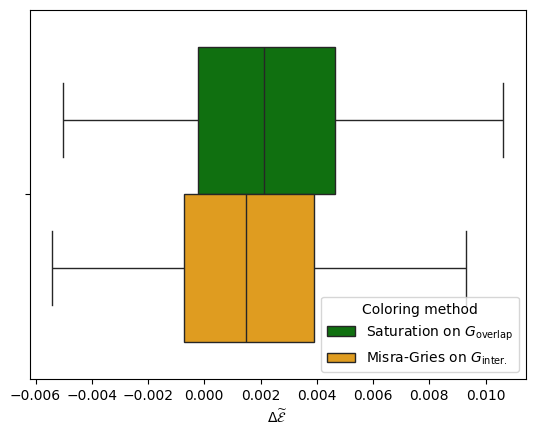

In [15]:
import seaborn as sns

df_maee_pretty = df_maee_pretty[df_maee["method"] != "none"]
sns.boxplot(
    data=df_maee_pretty,
    x="$\\Delta \\widetilde{\\mathcal{E}}$",
    hue="Coloring method",
    hue_order=[
        "Saturation on $G_{\\mathrm{overlap}}$",
        "Misra-Gries on $G_{\\mathrm{inter.}}$",
    ],
    palette={
        "Saturation on $G_{\\mathrm{overlap}}$": "green",
        "Misra-Gries on $G_{\\mathrm{inter.}}$": "orange",
    },
)

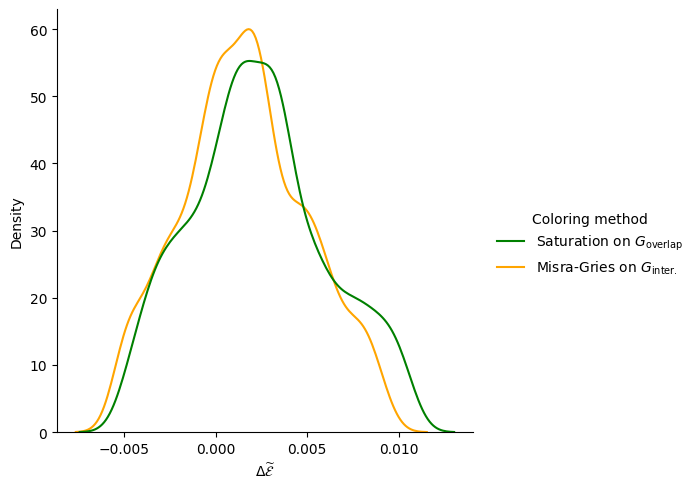

In [16]:
import seaborn as sns

sns.displot(
    data=df_maee_pretty,
    x="$\\Delta \\widetilde{\\mathcal{E}}$",
    kind="kde",
    hue="Coloring method",
    hue_order=[
        "Saturation on $G_{\\mathrm{overlap}}$",
        "Misra-Gries on $G_{\\mathrm{inter.}}$",
    ],
    palette={
        "Saturation on $G_{\\mathrm{overlap}}$": "green",
        "Misra-Gries on $G_{\\mathrm{inter.}}$": "orange",
    },
    # clip=(-3, 3),
)

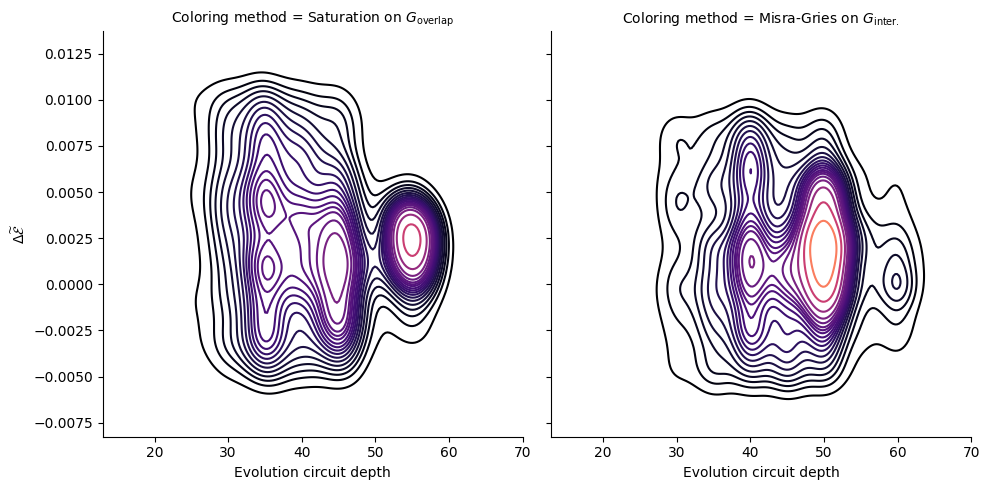

In [17]:
_df = df_maee_pretty[df_maee_pretty["Coloring method"] != "None"]

sns.displot(
    data=_df,
    x="Evolution circuit depth",
    y="$\\Delta \\widetilde{\\mathcal{E}}$",
    col="Coloring method",
    kind="kde",
    cmap="magma",
    levels=20,
    col_order=[
        "Saturation on $G_{\\mathrm{overlap}}$",
        "Misra-Gries on $G_{\\mathrm{inter.}}$",
    ],
    clip=((0, 70), (None, None)),
)

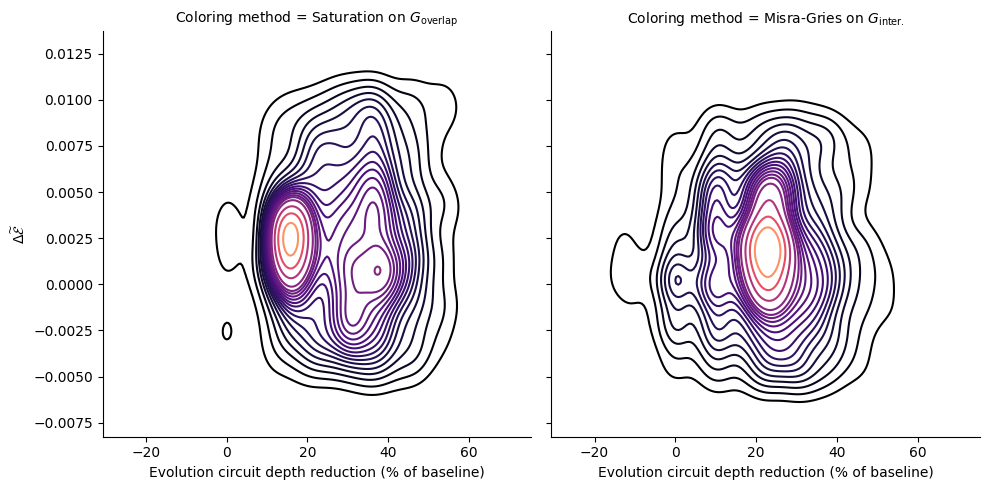

In [18]:
_df = df_maee_pretty[df_maee_pretty["Coloring method"] != "None"]

sns.displot(
    data=_df,
    x="Evolution circuit depth reduction (% of baseline)",
    y="$\\Delta \\widetilde{\\mathcal{E}}$",
    col="Coloring method",
    kind="kde",
    cmap="magma",
    levels=20,
    col_order=[
        "Saturation on $G_{\\mathrm{overlap}}$",
        "Misra-Gries on $G_{\\mathrm{inter.}}$",
    ],
    # clip=((0, 70), (-2, 2)),
)

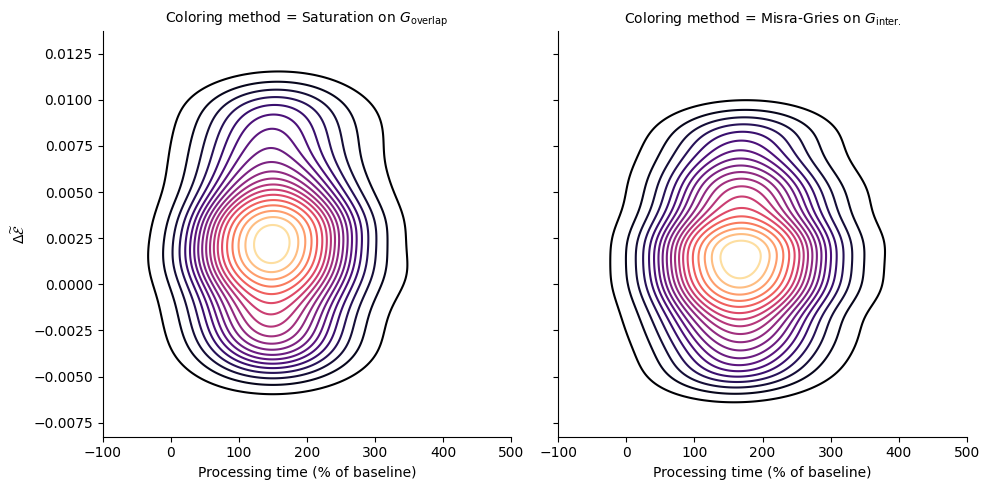

In [19]:
_df = df_maee_pretty[df_maee_pretty["Coloring method"] != "None"]

sns.displot(
    data=_df,
    x="Processing time (% of baseline)",
    y="$\\Delta \\widetilde{\\mathcal{E}}$",
    col="Coloring method",
    kind="kde",
    cmap="magma",
    levels=20,
    col_order=[
        "Saturation on $G_{\\mathrm{overlap}}$",
        "Misra-Gries on $G_{\\mathrm{inter.}}$",
    ],
    clip=((-100, 500), (None, None)),
)